# Table of Contents

**1.** Import Libraries



**2.** Data Cleaning
    
    2.1 Load the data
    
    2.2 Check for null values and modify the dataset

**3.** Exploratory Data Analysis 



**4.** Machine Learning

    4.1 Algorithm Selection with Cross-Validation

# 1.  Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
%matplotlib inline

# 2.  Data Cleaning

## 2.1 Load the data

In [2]:
# Load data

df = pd.read_csv('data/Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [3]:
df.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [5]:
# Load column descriptions

documentation = pd.read_csv('data/Debernardi et al 2020 documentation.csv')
documentation

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


## 2.2 Check for null values and modify the dataset

From the description of the columns above, the following heatmap gives us important information on how to deal with the null values:

* The purpose of this project is to use the urinary levels of certain biomarkers to detect presence of PDAC. This means we are not concerned (for now) with the stage of cancer or the type of benign disease.
    
    * *Create a new output variable called 'has_cancer'* with values 0 (no) and 1 (yes) using information from the columns 'diagnosis', 'stage', and 'benign_sample_diagnosis'


* The column 'plasma_CA19_9' indicates  blood plasma levels of a protein, and was only collected for some of the patients.
    
    * *Drop 'plasma_CA19_9'* since we are only interested in urine  biomarkers
    
    
* The column 'REG1A' was only collected in 306 of the 590 patients
    
    * *Drop 'REG1A'* for  now. This may be  revisited later for more domain specific analysis
    
    
* The  columns 'sample_id', 'patient_cohort', and 'sample_origin' do not give enough information without more context
    
    * *Drop these columns*
    
    
* The column 'sample_origin' is also not meaningful under the assumption that the same sample collection procedure was used in all centers
    
    * *Drop sample_origin*
    
    
* The column 'sex' is categorical, with two values M and F. 
    
    * *Convert to dummy variable for one of the genders*

<AxesSubplot:>

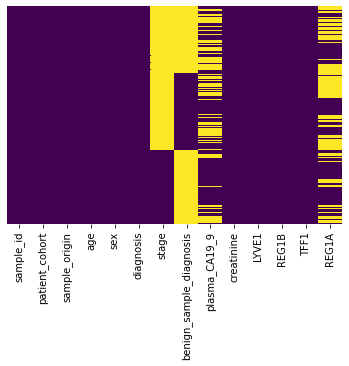

In [6]:
# Check for null values

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
# Read full details of columns with null values

documentation['Details'][8]

'Blood plasma levels of CA 19–9 monoclonal antibody that is often elevated in patients with pancreatic cancer. Only assessed in 350 patients (one goal of the study was to compare various CA 19-9 cutpoints from a blood sample to the model developed using urinary samples).'

In [8]:
documentation['Details'][13]

'Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)'

In [9]:
documentation['Details'][1]

'Cohort 1,  previously used samples; Cohort 2, newly added samples'

In [10]:
# Define function to clean data

def clean_data(data):
    '''
    Takes the full dataset as an argument and returns the cleaned dataset
    '''
    
    # Create output column 'has_disease'
    
    data['has_disease'] = [1 if x == 3 else 0 for x in data['diagnosis']]
        
    # Deal with categorical variable 'sex'
    # Create dummy  variable and concatenate to dataframe
    
    is_male = pd.get_dummies(df['sex'], drop_first=True)
    data = pd.concat([data, is_male], axis=1)

        # Drop columns that aren't useful to the analysis
    
    columns_to_drop = ['sample_id',
                       'patient_cohort',
                       'sex',
                       'sample_origin',
                       'diagnosis',
                       'stage',
                       'benign_sample_diagnosis',
                       'plasma_CA19_9',
                       'REG1A']
    
    data_cleaned = data.drop(columns_to_drop, axis=1)
        
    return data_cleaned

In [11]:
df = clean_data(df)

x = df.drop('has_disease',  axis=1)
y = df['has_disease']

# 3. Exploratory Data Analysis

* In general, patients with cancer are likely to be older.


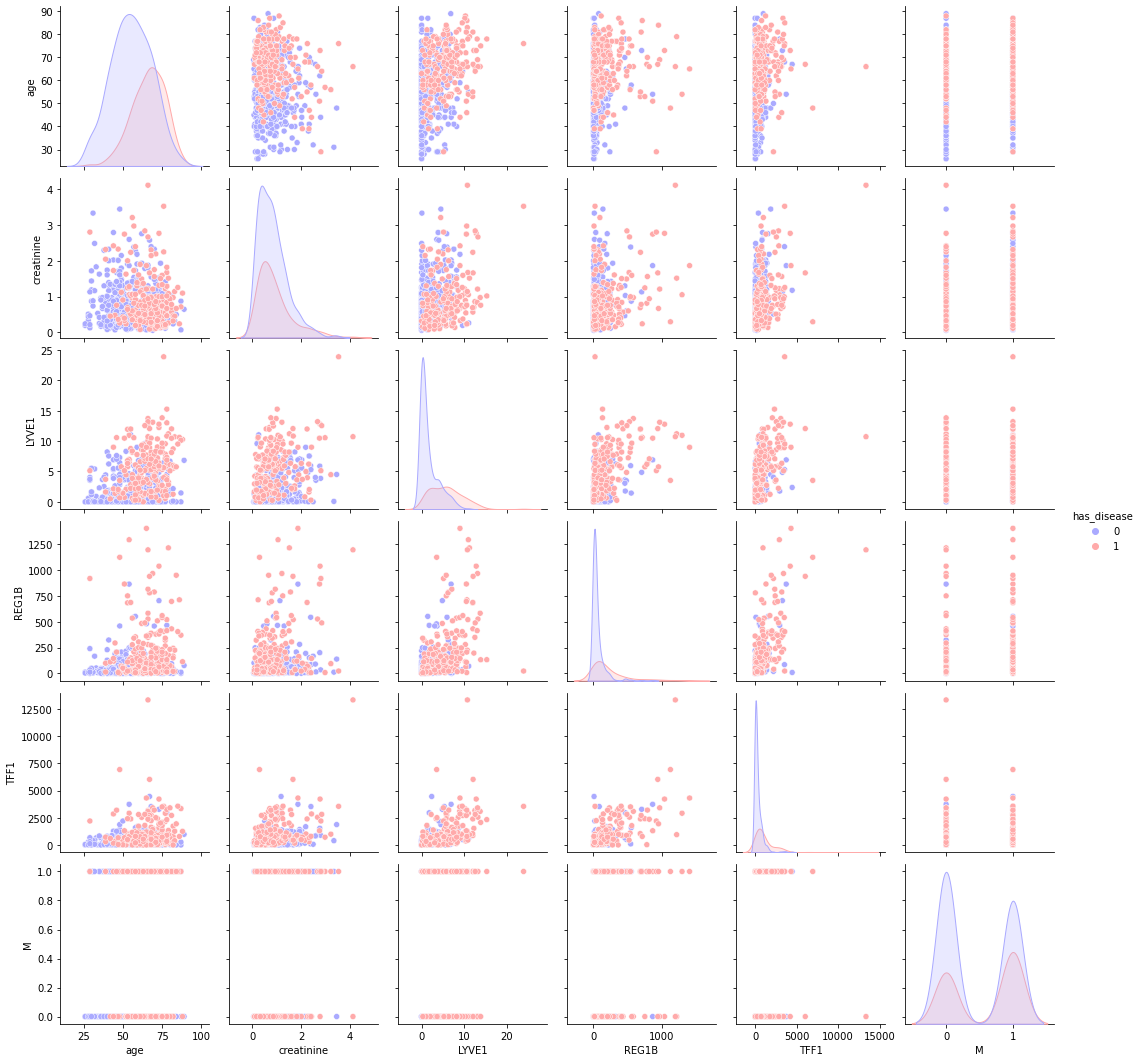

In [12]:
# Create basic plots to explore data

# Pair plot

sns.pairplot(df, hue='has_disease', palette='bwr')

Text(0.5, 1.0, 'Correlation Matrix: PDAC urine samples\n')

<Figure size 576x576 with 0 Axes>

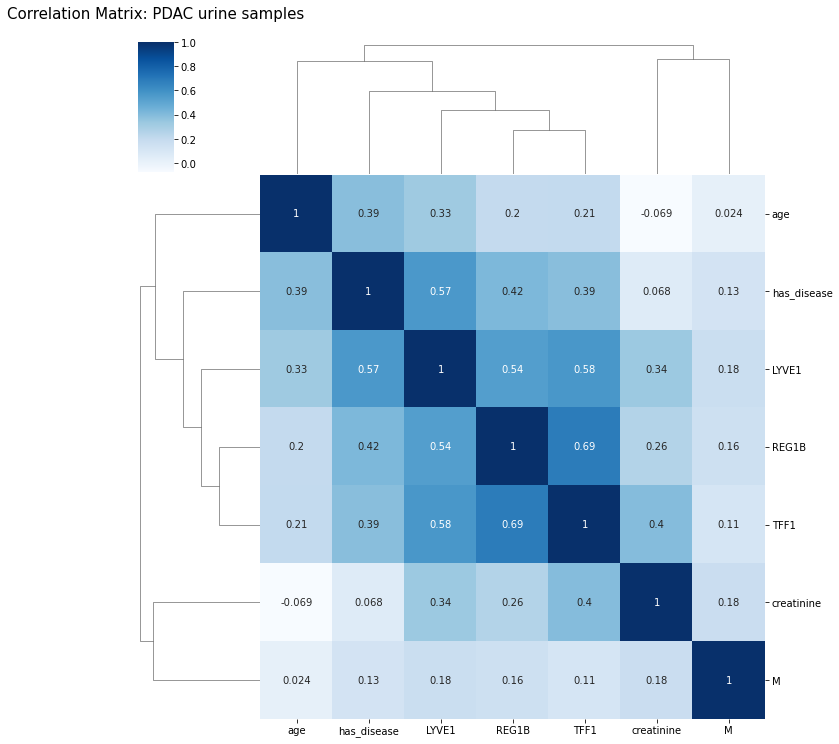

In [13]:
#  Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.clustermap(correlation_matrix, 
               annot=True, 
               cmap='Blues')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix: PDAC urine samples\n', fontsize=15)

* Having cancer is strongly correlated to  different degrees, to levels  of protein biomarkers but weakly correlated to creatinine levels. 
* It is also possible that some of these biomarkers exist in the body together, since levels of some biomarkers are strongly correlated to each other. 
* Age has a relatively strong correlation  to presence of cancer, but sex does not. 

# 4. Machine Learning

## 4.1 Algorithm Selection  with Cross-Validation

First thing we need to do is make train test split. This initial split will give us a training set and an unseen test set. This  train-test split will be stratified to ensure a similar distribution of cancer and control samples  in  the split. 

We will then use k fold cross validation on the training set to select our model, tune the hyperparameters, and finally evaluate our results on the test set before deployment. 

In [14]:
from sklearn.model_selection import train_test_split

# Cross validation for algorithm selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Cross validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For final model evaluation
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33,  
                                                    stratify=y)

In [15]:
# Define a function to run cross validation on a given set of models

def get_results(models_dict, training_data, training_labels, metrics_of_interest):
    '''
    Takes the data, labels, a dictionary of classification models, and a list of metrics as the inputs 
    and prints the average accuracy with cross validation.
    '''
    models_list = [(name, model_object) for name, model_object in models_dict.items()]
        
    
    for model in models_list:
        
        # Define a pipeline object takes in a  list of tuples  as steps.
        # Each step contains a string name and an object of the step, like a transform or a model

        steps = []
        steps.append(('scaler', RobustScaler()))
        steps.append(model)
        pipeline = Pipeline(steps=steps)
        
        # Define evaluation precedures using RepeatedStratifiedKFold
        # Repeated means the cross validation is repeated
        # Stratified means each fold in t he k fold cross validation has a similar distribution of samples as the main dataset
        # We will repeat the process 5 times and use 10 folds
        
        cross_val = RepeatedStratifiedKFold(n_splits=10,  n_repeats=5)
        
        # Evaluate the model
        # Inefficient way to evaluate multiple metrics:
        
        print(model[0],':')
        
        for metric in metrics_of_interest:
            
            scores = cross_val_score(pipeline, 
                                     training_data, 
                                     training_labels, 
                                     scoring=metric, 
                                     cv=cross_val, 
                                     n_jobs=-1)
            
            print('Mean',metric, ':  %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
        
        print('\n')

In [16]:
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models_used = {'Logistic Regression': LogisticRegression(),
               'Random Forest': RandomForestClassifier(),
               'Support Vector Machines': SVC(),
               'k-Nearest Neighbors': KNeighborsClassifier(),
              }

metrics_used = ['accuracy', 'recall', 'roc_auc']

get_results(models_used, x_train, y_train, metrics_used)

Logistic Regression :
Mean accuracy :  0.780 (0.052)
Mean recall :  0.544 (0.137)
Mean roc_auc :  0.853 (0.056)


Random Forest :
Mean accuracy :  0.799 (0.055)
Mean recall :  0.654 (0.130)
Mean roc_auc :  0.869 (0.060)


Support Vector Machines :
Mean accuracy :  0.800 (0.058)
Mean recall :  0.595 (0.117)
Mean roc_auc :  0.852 (0.074)


k-Nearest Neighbors :
Mean accuracy :  0.780 (0.072)
Mean recall :  0.626 (0.122)
Mean roc_auc :  0.815 (0.067)




**Random forest** performs best _most  often_ in all metrics tested. 
Depending on the train test split, **SVM** _sometimes_ outperforms random forest in overall accuracy.

Notably however, random forest consistently provides the highest average recall score regardless of train test split. Since recall is an important metric for medical daignoses, this is a valid reason to select random forest over the other algorithms tested.

## 4.2 Model Selection with Feature Selection and Cross Validation

## 4.3 Hyperparameter Tuning

Pick the two best algorithms and tune the hyperparameters: SVM and Random Forest

In [17]:
models_dict = {'Random Forest': RandomForestClassifier(),
               'Support Vector Machines': SVC(),
               'Logistic Regression': LogisticRegression()
              }

param_space = {'Random Forest': {'max_depth': [10,25,50,75,100,150,200],
                                 'min_samples_leaf': [2,4,6,7,8,9,10,11,12,13,14,15,20,25,50]
                                },
               
               'Support Vector Machines': {'C': np.power(10., np.arange(-4,4)),
                                           'gamma': np.power(10., np.arange(-5,0))},
               
               'Logistic Regression': {}
               
              }

metrics_used = ['accuracy', 'recall', 'roc_auc']

for model in  models_dict:
    
    rs = RandomizedSearchCV(models_dict[model],
                      param_distributions=param_space[model],
                      scoring='accuracy',
                      n_jobs=-1,
                      n_iter=200,
                      cv=5,
                      )

    rs.fit(x_train, y_train)
    print(model,':')
    print('Optimal hyperparameter combination: ', rs.best_params_)
    print('\n')
    rs.best_estimator_.fit(x_train, y_train)
    
    y_pred = rs.best_estimator_.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('\n\n')
    
    

Random Forest :
Optimal hyperparameter combination:  {'min_samples_leaf': 13, 'max_depth': 10}


[[118  11]
 [ 22  44]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       129
           1       0.80      0.67      0.73        66

    accuracy                           0.83       195
   macro avg       0.82      0.79      0.80       195
weighted avg       0.83      0.83      0.83       195




Support Vector Machines :
Optimal hyperparameter combination:  {'gamma': 1e-05, 'C': 1.0}


[[124   5]
 [ 47  19]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       129
           1       0.79      0.29      0.42        66

    accuracy                           0.73       195
   macro avg       0.76      0.62      0.62       195
weighted avg       0.75      0.73      0.69       195




Logistic Regression :
Optimal hyperparameter combination:  {}


[[117  12]
 [ 26  40]]
              prec